<a href="https://colab.research.google.com/github/Rian021102/Lithofacies-Prediction/blob/main/Lithofacies_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. GR: Gamma Ray from Gamma Ray Log Tool, this tool counts Gamma Ray emited by formation. Shale has higher Gamma Ray since it has radioactive mineral
2. ILD_log10 : Induction Resistivity is tool that measure resistivity formation.
3. PE : photoelectric effect (in My cases it will be deleted since we never use PEF Log).
4. DeltaPHI: The difference between Neutron Density Porosity Log.
5. PNHIND: Porosity or average Neutron Density Porosity.
6. NM_M :nonmarine-marine indicator
7. RELPOS: relative position


1. (SS) Nonmarine sandstone
2. (CSiS) Nonmarine coarse siltstone
3. (FSiS) Nonmarine fine siltstone
4. (SiSH) Marine siltstone and shale
5. (MS) Mudstone (limestone)
6. (WS) Wackestone (limestone)
7. (D) Dolomite
8. (PS) Packstone-grainstone (limestone)
9. (BS) Phylloid-algal bafflestone (limestone)

# Import All Libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option
set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None

# Load the Dataset

In [2]:
url = 'https://drive.google.com/file/d/19UU1UL6J-VfnV29AQoVlpWaqoVOdywPO/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
     

In [3]:
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


In [4]:
df.shape

(4149, 11)

In [5]:
df['Facies'].unique()

array([3, 2, 8, 6, 7, 4, 5, 9, 1])

In [6]:
df.describe(include='all')

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,4149.000000,4149,4149,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,3232.000000,4149.000000,4149.000000
unique,NaN,14,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,C LM,CROSS H CATTLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,662,501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.503254,NaN,NaN,2906.867438,64.933985,0.659566,4.402484,13.201066,3.725014,1.518438,0.521852
...,...,...,...,...,...,...,...,...,...,...,...
min,1.000000,NaN,NaN,2573.500000,10.149000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.000000
25%,2.000000,NaN,NaN,2821.500000,44.730000,0.498000,1.600000,8.500000,3.100000,1.000000,0.277000
50%,4.000000,NaN,NaN,2932.500000,64.990000,0.639000,4.300000,12.020000,3.551500,2.000000,0.528000
75%,6.000000,NaN,NaN,3007.000000,79.438000,0.822000,7.500000,16.050000,4.300000,2.000000,0.769000


In [7]:
df.isna().sum()

Facies         0
Formation      0
Well Name      0
Depth          0
GR             0
            ... 
DeltaPHI       0
PHIND          0
PE           917
NM_M           0
RELPOS         0
Length: 11, dtype: int64

In [8]:
df01=df.copy()

In [9]:
df01.drop(['PE','RELPOS'],axis=1, inplace=True)

In [10]:
df['Well Name'].unique()

array(['SHRIMPLIN', 'ALEXANDER D', 'SHANKLE', 'LUKE G U', 'KIMZEY A',
       'CROSS H CATTLE', 'NOLAN', 'Recruit F9', 'NEWBY',
       'CHURCHMAN BIBLE'], dtype=object)

In [11]:
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS',
                 'WS', 'D','PS', 'BS']
#facies_color_map is a dictionary that maps facies labels to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ row['Facies'] -1]
    
df01.loc[:,'FaciesLabels'] = df01.apply(lambda row: label_facies(row, facies_labels), axis=1)

In [12]:
def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=5, figsize=(12, 5))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.40')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    im=ax[4].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    
    divider = make_axes_locatable(ax[4])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((5*' ').join([' SS ', 'CSiS', 'FSiS', 
                                'SiSh', ' MS ', ' WS ', ' D  ', 
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel('Facies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[4].set_yticklabels([])
    ax[4].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

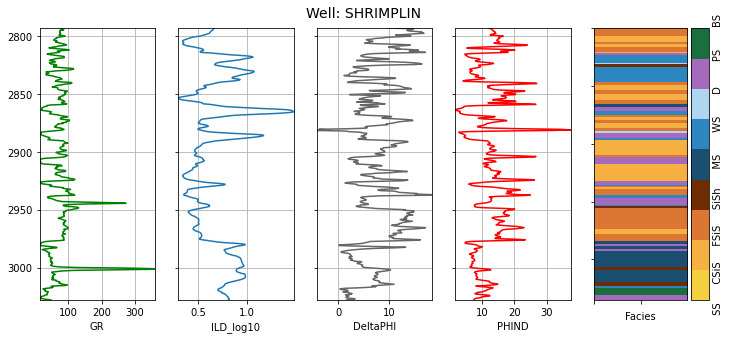

In [13]:
make_facies_log_plot(df01[df01['Well Name'] == 'SHRIMPLIN'],facies_colors)

#EDA

In [14]:
df_litho = df01['Facies'].value_counts().rename_axis('Facies').reset_index(name='counts')
df_litho

,Facies,counts
0,2,940
1,3,780
2,8,686
3,6,582
4,5,296
5,4,271
6,1,268
7,9,185
8,7,141


## Facies Distribution

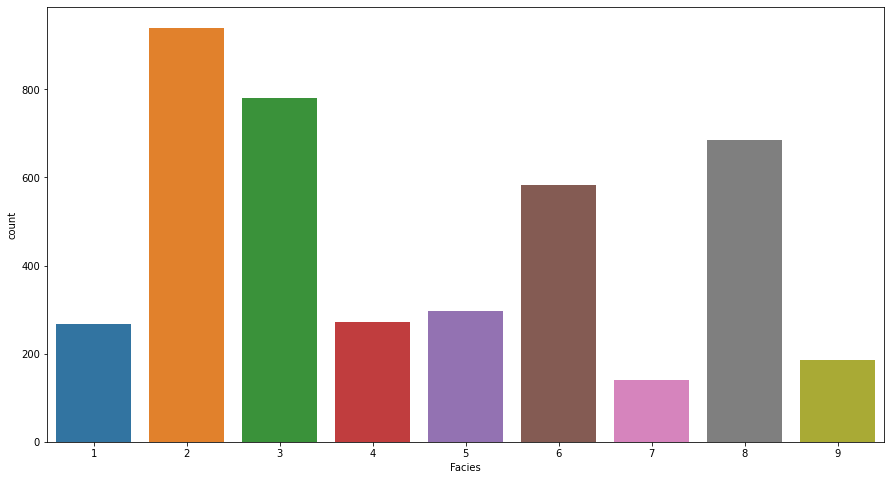

In [15]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x='Facies',data=df01, ax=ax)
plt.show()

# Setting Training Data and Test Data

In [16]:
df01['Well Name'].unique()

array(['SHRIMPLIN', 'ALEXANDER D', 'SHANKLE', 'LUKE G U', 'KIMZEY A',
       'CROSS H CATTLE', 'NOLAN', 'Recruit F9', 'NEWBY',
       'CHURCHMAN BIBLE'], dtype=object)

## Making New Train DataFrame

In [17]:
train_list = ['SHRIMPLIN', 'ALEXANDER D', 'SHANKLE', 'LUKE G U', 'KIMZEY A']

dftrain = df01[df['Well Name'].isin(train_list)]
dftrain

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,NM_M,FaciesLabels
0,3,A1 SH,SHRIMPLIN,2793.0,77.450,0.664,9.900,11.9150,1,FSiS
1,3,A1 SH,SHRIMPLIN,2793.5,78.260,0.661,14.200,12.5650,1,FSiS
2,3,A1 SH,SHRIMPLIN,2794.0,79.050,0.658,14.800,13.0500,1,FSiS
3,3,A1 SH,SHRIMPLIN,2794.5,86.100,0.655,13.900,13.1150,1,FSiS
4,3,A1 SH,SHRIMPLIN,2795.0,74.580,0.647,13.500,13.3000,1,FSiS
...,...,...,...,...,...,...,...,...,...,...
2281,4,C LM,KIMZEY A,3136.0,86.023,0.688,10.949,11.7335,2,SiSh
2282,6,C LM,KIMZEY A,3136.5,101.037,0.732,10.179,12.0085,2,WS
2283,6,C LM,KIMZEY A,3137.0,153.374,0.748,8.198,13.4390,2,WS
2284,6,C LM,KIMZEY A,3137.5,144.117,0.672,9.188,13.4390,2,WS


## Making Test DataFrame

In [18]:
test_list = ['CROSS H CATTLE', 'NOLAN', 'Recruit F9', 'NEWBY',
             'CHURCHMAN BIBLE']

dftest = df01[df['Well Name'].isin(test_list)]
dftest

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,NM_M,FaciesLabels
2286,2,A1 SH,CROSS H CATTLE,2573.5,118.439,0.674494,6.300,9.950,1,CSiS
2287,2,A1 SH,CROSS H CATTLE,2574.0,92.550,0.645226,9.900,13.050,1,CSiS
2288,2,A1 SH,CROSS H CATTLE,2574.5,102.168,0.630021,12.000,14.500,1,CSiS
2289,2,A1 SH,CROSS H CATTLE,2575.0,88.898,0.600319,15.100,16.050,1,CSiS
2290,2,A1 SH,CROSS H CATTLE,2575.5,85.493,0.578639,13.600,15.900,1,CSiS
...,...,...,...,...,...,...,...,...,...,...
4144,5,C LM,CHURCHMAN BIBLE,3120.5,46.719,0.947000,1.828,7.254,2,MS
4145,5,C LM,CHURCHMAN BIBLE,3121.0,44.563,0.953000,2.241,8.013,2,MS
4146,5,C LM,CHURCHMAN BIBLE,3121.5,49.719,0.964000,2.925,8.013,2,MS
4147,5,C LM,CHURCHMAN BIBLE,3122.0,51.469,0.965000,3.083,7.708,2,MS


In [19]:
dftrain01=dftrain.copy()

In [20]:
dftrain02=dftrain01.sort_values(by=['Depth'], ascending=True)

In [21]:
dftrain02

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,NM_M,FaciesLabels
1386,3,A1 SH,LUKE G U,2610.5,74.900,0.782,9.300,11.7500,1,FSiS
1387,3,A1 SH,LUKE G U,2611.0,83.800,0.745,12.000,13.1000,1,FSiS
1388,3,A1 SH,LUKE G U,2611.5,86.970,0.726,12.900,12.5500,1,FSiS
1389,3,A1 SH,LUKE G U,2612.0,84.430,0.708,13.200,12.0000,1,FSiS
1390,3,A1 SH,LUKE G U,2612.5,78.510,0.708,11.800,11.4000,1,FSiS
...,...,...,...,...,...,...,...,...,...,...
2281,4,C LM,KIMZEY A,3136.0,86.023,0.688,10.949,11.7335,2,SiSh
2282,6,C LM,KIMZEY A,3136.5,101.037,0.732,10.179,12.0085,2,WS
2283,6,C LM,KIMZEY A,3137.0,153.374,0.748,8.198,13.4390,2,WS
2284,6,C LM,KIMZEY A,3137.5,144.117,0.672,9.188,13.4390,2,WS


## Drop Columns that Unecessary For Machine Learning

In [22]:
dftrain02.drop(['Formation','Well Name','FaciesLabels'], axis=1, inplace=True)

## Correlation Heatmap

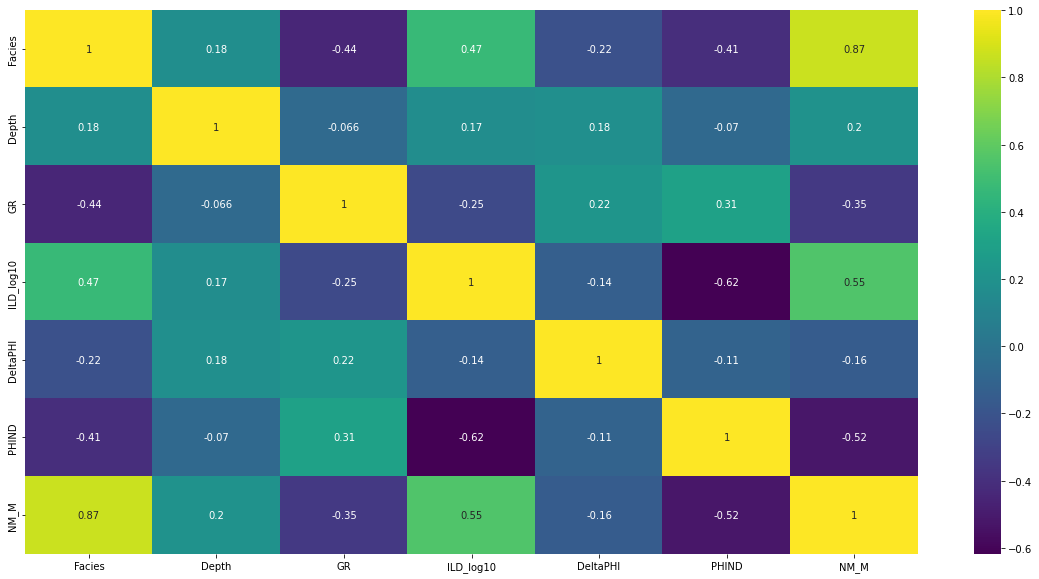

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(data=dftrain02.corr(), annot=True, cmap='viridis')

## Setting Feature and Label

In [24]:
X_train =dftrain02.drop(['Facies'],axis=1)
y_train =dftrain02[['Facies']]

# Data Preprocessing

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state=0)

## Decision Tree

In [27]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred01=dt.predict(X_test)
model01=accuracy_score(y_test,pred01)
matrix01=confusion_matrix(y_test,pred01)
print(model01)
print(matrix01)
print(classification_report(y_test, pred01))

0.7139737991266376
[[19  2  3  0  0  0  0  0  0]
 [ 8 81 22  0  0  0  0  0  0]
 [ 2 23 67  0  0  0  0  0  0]
 [ 0  0  0 21  3  3  0  2  0]
 [ 0  0  0  4 17  3  1  2  0]
 [ 0  0  1  5  4 51  0 10  1]
 [ 0  0  0  2  2  0  7  1  1]
 [ 0  0  0  2  6 13  4 60  0]
 [ 0  0  0  0  0  1  0  0  4]]
              precision    recall  f1-score   support

           1       0.66      0.79      0.72        24
           2       0.76      0.73      0.75       111
           3       0.72      0.73      0.72        92
           4       0.62      0.72      0.67        29
           5       0.53      0.63      0.58        27
           6       0.72      0.71      0.71        72
           7       0.58      0.54      0.56        13
           8       0.80      0.71      0.75        85
           9       0.67      0.80      0.73         5

    accuracy                           0.71       458
   macro avg       0.67      0.71      0.69       458
weighted avg       0.72      0.71      0.72       458



## Random Forest

In [28]:
rfs=RandomForestClassifier()
rfs.fit(X_train,y_train)
pred02=rfs.predict(X_test)
model02=accuracy_score(y_test,pred02)
matrix02=confusion_matrix(y_test,pred02)
print(model02)
print(matrix02)
print(classification_report(y_test, pred02))

<ipython-input-28-d944af4a35d6>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfs.fit(X_train,y_train)


0.8078602620087336
[[20  3  1  0  0  0  0  0  0]
 [ 0 88 23  0  0  0  0  0  0]
 [ 2 11 79  0  0  0  0  0  0]
 [ 0  0  0 26  1  1  0  1  0]
 [ 0  0  0  1 19  4  2  1  0]
 [ 0  0  1  4  7 54  0  6  0]
 [ 0  0  0  0  0  1 11  1  0]
 [ 0  0  0  4  4  6  1 70  0]
 [ 0  0  0  1  0  0  0  1  3]]
              precision    recall  f1-score   support

           1       0.91      0.83      0.87        24
           2       0.86      0.79      0.83       111
           3       0.76      0.86      0.81        92
           4       0.72      0.90      0.80        29
           5       0.61      0.70      0.66        27
           6       0.82      0.75      0.78        72
           7       0.79      0.85      0.81        13
           8       0.88      0.82      0.85        85
           9       1.00      0.60      0.75         5

    accuracy                           0.81       458
   macro avg       0.82      0.79      0.79       458
weighted avg       0.82      0.81      0.81       458



## XGB

In [29]:
xgb = XGBClassifier(use_label_encoder=True, eval_metric='mlogloss')

In [30]:
xgb.fit(X_train, y_train)
pred03=xgb.predict(X_test)
model03=accuracy_score(y_test,pred03)
matrix03=confusion_matrix(y_test,pred03)
print(model03)
print(matrix03)
print(classification_report(y_test, pred03))

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7292576419213974
[[18  5  1  0  0  0  0  0  0]
 [ 1 83 27  0  0  0  0  0  0]
 [ 3 17 72  0  0  0  0  0  0]
 [ 0  0  0 25  2  2  0  0  0]
 [ 0  0  0  1 19  5  1  1  0]
 [ 0  0  1  6  7 47  3  8  0]
 [ 0  0  0  0  0  2 11  0  0]
 [ 0  0  0  4  6 13  4 58  0]
 [ 0  0  0  0  0  2  0  2  1]]
              precision    recall  f1-score   support

           1       0.82      0.75      0.78        24
           2       0.79      0.75      0.77       111
           3       0.71      0.78      0.75        92
           4       0.69      0.86      0.77        29
           5       0.56      0.70      0.62        27
           6       0.66      0.65      0.66        72
           7       0.58      0.85      0.69        13
           8       0.84      0.68      0.75        85
           9       1.00      0.20      0.33         5

    accuracy                           0.73       458
   macro avg       0.74      0.69      0.68       458
weighted avg       0.74      0.73      0.73       458



## ADA Boost

In [31]:
from sklearn.ensemble import AdaBoostClassifier


# Create adaboost classifer object
ada = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)
ada.fit(X_train, y_train)
pred04=ada.predict(X_test)
model04=accuracy_score(y_test,pred04)
matrix04=confusion_matrix(y_test,pred04)
print(model04)
print(matrix04)
print(classification_report(y_test, pred04))

0.22489082969432314
[[ 0  3  1  0  0 20  0  0  0]
 [ 0 13 29  0  0 69  0  0  0]
 [ 0  5 33  0  0 54  0  0  0]
 [ 0  0  0 22  1  5  0  1  0]
 [ 0  0  0 10  0  8  0  1  8]
 [ 0  0  0 10  5 22  5 18 12]
 [ 0  0  0  1  2  0  8  1  1]
 [ 0  0  0  4  2 15 22  3 39]
 [ 0  0  0  1  0  1  0  1  2]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        24
           2       0.62      0.12      0.20       111
           3       0.52      0.36      0.43        92
           4       0.46      0.76      0.57        29
           5       0.00      0.00      0.00        27
           6       0.11      0.31      0.17        72
           7       0.23      0.62      0.33        13
           8       0.12      0.04      0.05        85
           9       0.03      0.40      0.06         5

    accuracy                           0.22       458
   macro avg       0.23      0.29      0.20       458
weighted avg       0.33      0.22      0.22       458



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and

**Based on the result RandomForest has the best accuracy**

In [32]:
dftest01=dftest.copy()

# Predicting The Test Dataframe with Trained Random Forest Model

In [33]:
dftest01.columns.to_list()

['Facies',
 'Formation',
 'Well Name',
 'Depth',
 'GR',
 'ILD_log10',
 'DeltaPHI',
 'PHIND',
 'NM_M',
 'FaciesLabels']

In [34]:
dftest01.drop(['Facies','Formation','Well Name','FaciesLabels'], axis=1, inplace=True)

In [35]:
dftest01['faciespredicted']=rfs.predict(dftest01)
dftest01

,Depth,GR,ILD_log10,DeltaPHI,PHIND,NM_M,faciespredicted
2286,2573.5,118.439,0.674494,6.300,9.950,1,3
2287,2574.0,92.550,0.645226,9.900,13.050,1,2
2288,2574.5,102.168,0.630021,12.000,14.500,1,2
2289,2575.0,88.898,0.600319,15.100,16.050,1,3
2290,2575.5,85.493,0.578639,13.600,15.900,1,3
...,...,...,...,...,...,...,...
4144,3120.5,46.719,0.947000,1.828,7.254,2,5
4145,3121.0,44.563,0.953000,2.241,8.013,2,6
4146,3121.5,49.719,0.964000,2.925,8.013,2,5
4147,3122.0,51.469,0.965000,3.083,7.708,2,5


In [36]:
dfpredicted=dftest01[['Depth','faciespredicted']]

In [37]:
dfresult=pd.merge(dftest, dfpredicted, on="Depth")

## Result

In [38]:
dfresult

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,NM_M,FaciesLabels,faciespredicted
0,2,A1 SH,CROSS H CATTLE,2573.5,118.439,0.674494,6.300,9.950,1,CSiS,3
1,2,A1 SH,CROSS H CATTLE,2574.0,92.550,0.645226,9.900,13.050,1,CSiS,2
2,2,A1 SH,CROSS H CATTLE,2574.5,102.168,0.630021,12.000,14.500,1,CSiS,2
3,2,A1 SH,CROSS H CATTLE,2575.0,88.898,0.600319,15.100,16.050,1,CSiS,3
4,2,A1 SH,CROSS H CATTLE,2575.5,85.493,0.578639,13.600,15.900,1,CSiS,3
...,...,...,...,...,...,...,...,...,...,...,...
4090,5,C LM,CHURCHMAN BIBLE,3120.5,46.719,0.947000,1.828,7.254,2,MS,5
4091,5,C LM,CHURCHMAN BIBLE,3121.0,44.563,0.953000,2.241,8.013,2,MS,6
4092,5,C LM,CHURCHMAN BIBLE,3121.5,49.719,0.964000,2.925,8.013,2,MS,5
4093,5,C LM,CHURCHMAN BIBLE,3122.0,51.469,0.965000,3.083,7.708,2,MS,5


In [39]:
dfresult01=dfresult[['Well Name', 'Formation','GR','ILD_log10','DeltaPHI','PHIND','NM_M','FaciesLabels','Facies','faciespredicted']]
dfresult01

,Well Name,Formation,GR,ILD_log10,DeltaPHI,PHIND,NM_M,FaciesLabels,Facies,faciespredicted
0,CROSS H CATTLE,A1 SH,118.439,0.674494,6.300,9.950,1,CSiS,2,3
1,CROSS H CATTLE,A1 SH,92.550,0.645226,9.900,13.050,1,CSiS,2,2
2,CROSS H CATTLE,A1 SH,102.168,0.630021,12.000,14.500,1,CSiS,2,2
3,CROSS H CATTLE,A1 SH,88.898,0.600319,15.100,16.050,1,CSiS,2,3
4,CROSS H CATTLE,A1 SH,85.493,0.578639,13.600,15.900,1,CSiS,2,3
...,...,...,...,...,...,...,...,...,...,...
4090,CHURCHMAN BIBLE,C LM,46.719,0.947000,1.828,7.254,2,MS,5,5
4091,CHURCHMAN BIBLE,C LM,44.563,0.953000,2.241,8.013,2,MS,5,6
4092,CHURCHMAN BIBLE,C LM,49.719,0.964000,2.925,8.013,2,MS,5,5
4093,CHURCHMAN BIBLE,C LM,51.469,0.965000,3.083,7.708,2,MS,5,5


**As we can see, the prediction values is pretty decent. There are numbers of predicted values that seems a bit off hence the accuracy is 81% with 5 wells as trained data. Maybe next will try to add more wells to train dataset to see if the accuracy can improve**

## Plot the Real Values and Predicted Values

In [40]:
def compare_facies_plot(logs, compadre, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster1 = np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(logs[compadre].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(12, 6))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    im1 = ax[4].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    im2 = ax[5].imshow(cluster2, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    
    divider = make_axes_locatable(ax[5])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar2=plt.colorbar(im2, cax=cax)
    cbar2.set_label((5*' ').join([' SS ', 'CSiS', 'FSiS', 
                                'SiSh', ' MS ', ' WS ', ' D  ', 
                                ' PS ', ' BS ']))
    cbar2.set_ticks(range(0,1)); cbar2.set_ticklabels('')
    
    for i in range(len(ax)-2):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel('Facies')
    ax[5].set_xlabel(compadre)
    
    ax[0].set_yticklabels([]); ax[1].set_yticklabels([]); ax[2].set_yticklabels([])
    ax[3].set_yticklabels([]); ax[4].set_yticklabels([]); 
    ax[5].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

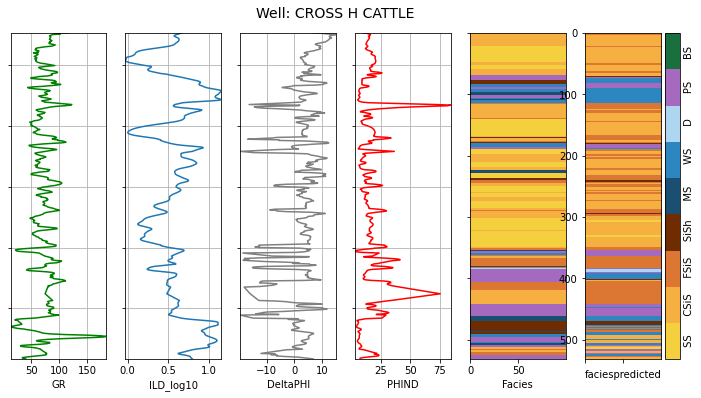

In [41]:
compare_facies_plot(dfresult[dfresult['Well Name']=='CROSS H CATTLE'],'faciespredicted', facies_colors)